In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read and load files
use the clean merged files found in the "Clean files" folder

In [2]:
input_folder = "Clean files/"
dataframes = {}

def open_dataframes(input_folder):
    for file in os.listdir(input_folder):
        file_path = os.path.join(input_folder, file)

        if file_path.endswith(".csv"):
            custom_name = file[:-4]
            df = pd.read_csv(file_path)
            dataframes[custom_name] = df

open_dataframes(input_folder)

In [3]:
Trastuzumab = pd.read_csv("Clean files/7mn8_DC.csv")

# Ploting the scores of Rosetta and AntiBERTy

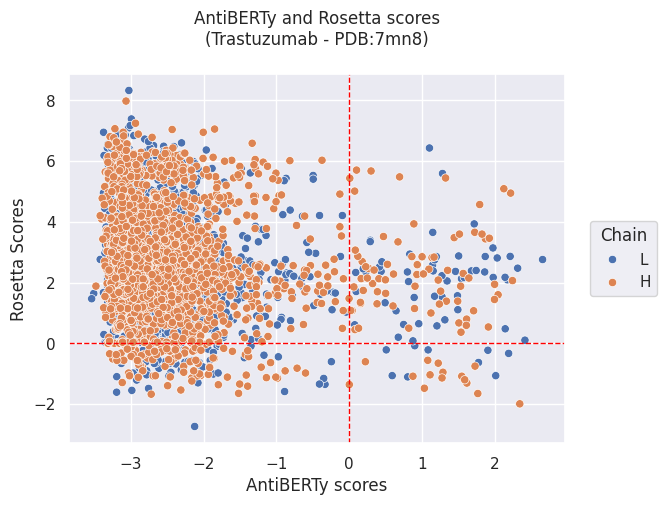

In [4]:
"""
Work with Trastuzumab
calculate the correlations - to see both linear(pearson_correlation) and non-linear(spearman_correlation) trends 
use seaborn to plot this
    axvline - vertical (y)
    axhline - horizontal (h)
    legend - to include the colour of the chains (for easier visualisation)
"""

# Trastuzumab = dataframes["7mn8_DC"]

pearson_correlation = Trastuzumab["AntiBERTy normalised"].corr(Trastuzumab["Rosetta normalised"])
spearman_correlation = Trastuzumab["AntiBERTy normalised"].corr(Trastuzumab["Rosetta normalised"], method = "spearman")
variance = np.var(Trastuzumab["AntiBERTy normalised"] - Trastuzumab["Rosetta normalised"])
std_dev = np.sqrt(variance)

sns.set_theme()
sns.scatterplot(data = Trastuzumab, x = "AntiBERTy normalised", y = "Rosetta normalised", hue = "chain")

plt.axvline(x=0, color = "red", linestyle = "--", linewidth = 1)
plt.axhline(y=0, color = "red", linestyle = "--", linewidth = 1)


plt.title(f"AntiBERTy and Rosetta scores\n"
          f"(Trastuzumab - PDB:7mn8)\n")
plt.xlabel("AntiBERTy scores")
plt.ylabel("Rosetta Scores")

plt.legend(bbox_to_anchor=(1.2, 0.5), loc = "right", title = "Chain")
# print(pearson_correlation, spearman_correlation, variability, std_dev)
plt.savefig("Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/Score_distribution_scatterplot", bbox_inches="tight")

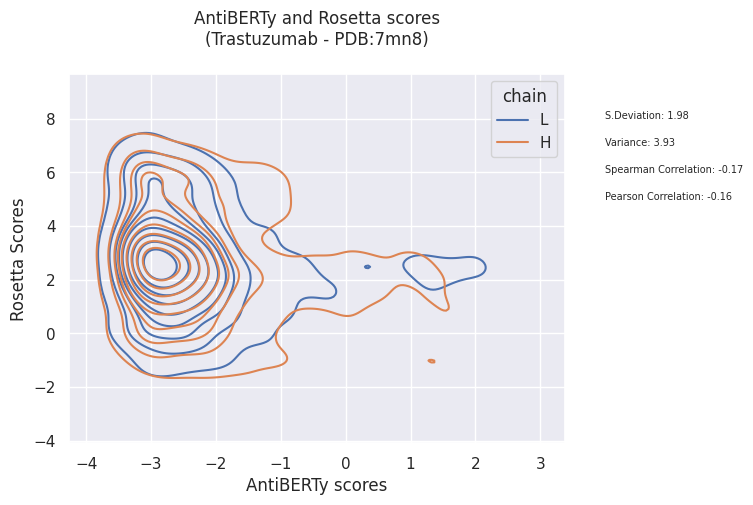

In [5]:
# Trastuzumab = dataframes["7mn8_DC"]

pearson_correlation = Trastuzumab["AntiBERTy normalised"].corr(Trastuzumab["Rosetta normalised"])
spearman_correlation = Trastuzumab["AntiBERTy normalised"].corr(Trastuzumab["Rosetta normalised"], method = "spearman")
variance = np.var(Trastuzumab["AntiBERTy normalised"] - Trastuzumab["Rosetta normalised"])
std_dev = np.sqrt(variance)

sns.set_theme()
sns.kdeplot(data = Trastuzumab, x = "AntiBERTy normalised", y = "Rosetta normalised", hue = "chain")

plt.title(f"AntiBERTy and Rosetta scores\n"
          f"(Trastuzumab - PDB:7mn8)\n")
plt.xlabel("AntiBERTy scores")
plt.ylabel("Rosetta Scores")
plt.text(4,5, f"Pearson Correlation: {pearson_correlation:.2f}", fontsize=7)  # .2f - 2 decimal places displayed
plt.text(4,6, f"Spearman Correlation: {spearman_correlation:.2f}", fontsize=7)
plt.text(4,7, f"Variance: {variance:.2f}", fontsize=7)
plt.text(4,8, f"S.Deviation: {std_dev:.2f}", fontsize=7)

plt.savefig("Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/Score_distribution_kde-plot", bbox_inches="tight")

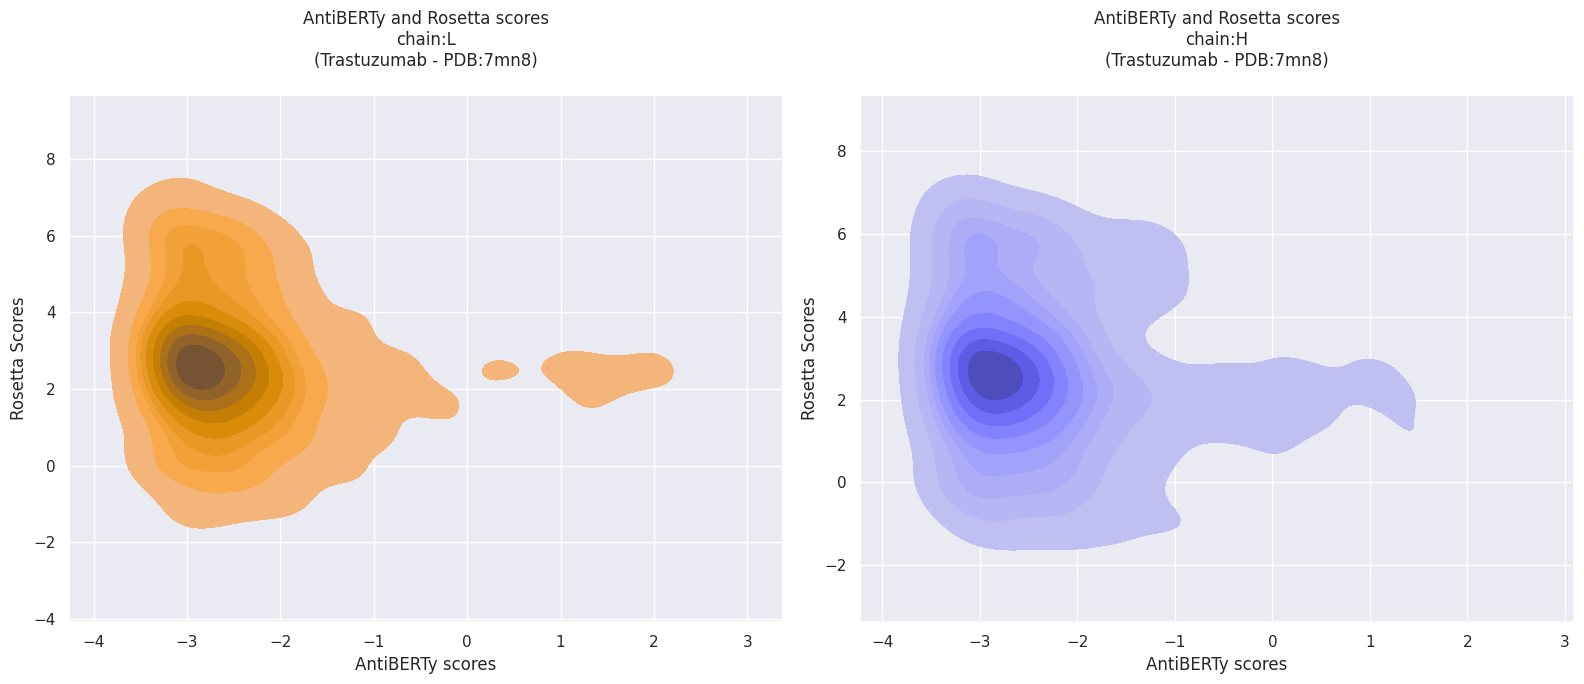

In [6]:
# Trastuzumab = dataframes["7mn8_DC"]

L_chain = Trastuzumab[Trastuzumab["chain"] == "L"]
H_chain = Trastuzumab[Trastuzumab["chain"] == "H"]

def plot_scores(ax, df, chain, color):
    pearson_correlation = Trastuzumab["AntiBERTy normalised"].corr(Trastuzumab["Rosetta normalised"])
    spearman_correlation = Trastuzumab["AntiBERTy normalised"].corr(Trastuzumab["Rosetta normalised"], method = "spearman")
    variance = np.var(Trastuzumab["AntiBERTy normalised"] - Trastuzumab["Rosetta normalised"])
    std_dev = np.sqrt(variance)

    sns.set_theme()
    sns.kdeplot(data = df, x = "AntiBERTy normalised", y = "Rosetta normalised", ax=ax, color=color, fill=True)
    
    ax.set_title(f"AntiBERTy and Rosetta scores\n"
              f"chain:{chain}\n"
              f"(Trastuzumab - PDB:7mn8)\n")
    ax.set_xlabel("AntiBERTy scores")
    ax.set_ylabel("Rosetta Scores")
    
    

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))  # creates a diagram with two plots (columns)
# plt.text(5,5, f"Pearson Correlation: {pearson_correlation:.2f}", fontsize=8)  # .2f - 2 decimal places displayed
# plt.text(5,5.5, f"Spearman Correlation: {spearman_correlation:.2f}", fontsize=8)
# plt.text(5,6, f"Variance: {variance:.2f}", fontsize=8)
# plt.text(5,6.5, f"S.Deviation: {std_dev:.2f}", fontsize=8)

# get the individual plots
plot_scores(axes[0], L_chain, "L", color="orange")
plot_scores(axes[1], H_chain, "H", color="blue")
plt.tight_layout()

plt.savefig("Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/Score_distribution_by_chain_kde_plot", bbox_inches="tight")

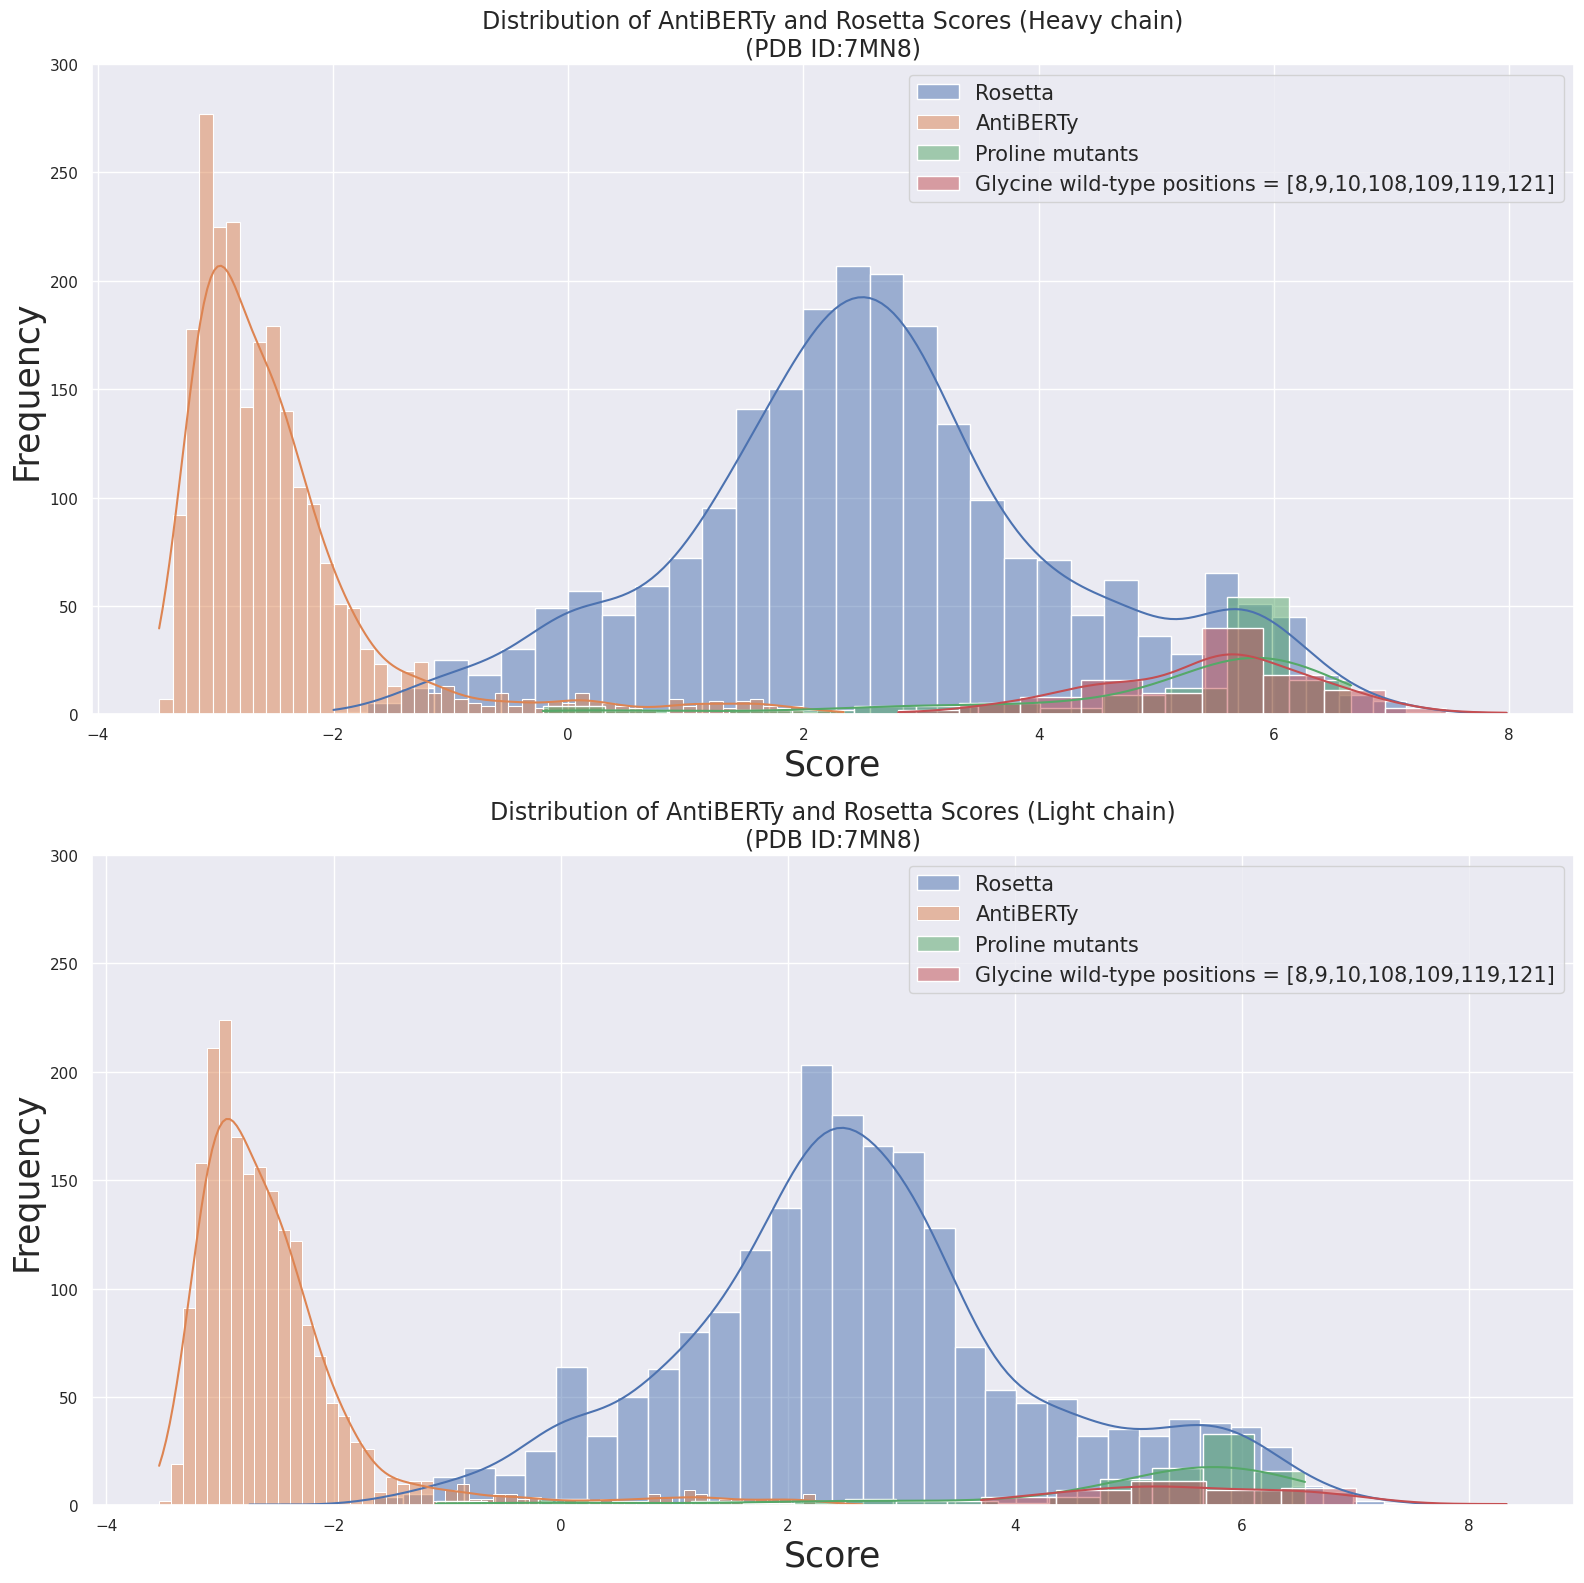

In [7]:
"""
Work with Trastuzumab
separate the scores  by the chain they belong to
calculate the correlations - to see both linear(pearson_correlation) and non-linear(spearman_correlation) trends 
calculate the variability and standard deviation 
use seaborn to plot this (histplot)
    kde=True - Kernel Density Estimation smooths the graph
    ax=ax - specify the axes (0 for left, 1 for right side of the graph)
    ax. - need to use this since we wrote ax=ax (it is kinda like calling each plot within the diagram)
    legend - automatic (only fontsize changed)
    ax.text - added to include the correlations, variability and standard deviation
    
"""

# Trastuzumab = dataframes["7mn8_DC"]

# separate chains
L_chain = Trastuzumab[Trastuzumab["chain"] == "L"]
H_chain = Trastuzumab[Trastuzumab["chain"] == "H"]

def plot_scores(ax, df, chain):
    pearson_correlation = df["AntiBERTy normalised"].corr(df["Rosetta normalised"])
    spearman_correlation = df["AntiBERTy normalised"].corr(df["Rosetta normalised"], method="spearman")
    variance = np.var(df["AntiBERTy normalised"] - df["Rosetta normalised"])
    std_dev = np.sqrt(variance)

    sns.histplot(df["Rosetta normalised"], kde=True, label="Rosetta", ax=ax)
    sns.histplot(df["AntiBERTy normalised"], kde=True, label="AntiBERTy", ax=ax)
    sns.histplot(df[df["MUT_AA"] == 'P']["Rosetta normalised"], kde=True, label="Proline mutants", ax=ax)
    sns.histplot(df[(df["WT_AA"] == 'G') & df["IMGT numbering"].isin([8,9,10,108,109,119,121])]["Rosetta normalised"], kde=True, label="Glycine wild-type positions = [8,9,10,108,109,119,121]", ax=ax)    
    
    

    ax.set_xlabel('Score', size=25)
    ax.set_ylabel('Frequency', size=25)
    ax.legend(fontsize = 15)
    ax.set_ylim([0,300])

    # Adding text annotations
    # ax.text(4.5,190, f"Pearson Correlation: {pearson_correlation:.2f}", fontsize=11)  # .2f - 2 decimal places displayed
    # ax.text(4.5,180, f"Spearman Correlation: {spearman_correlation:.2f}", fontsize=11)
    # ax.text(4.5,170, f"Variance: {variance:.2f}", fontsize=11)
    # ax.text(4.5,160, f"S.Deviation: {std_dev:.2f}", fontsize=11)

    ax.set_title(f"Distribution of AntiBERTy and Rosetta Scores ({chain} chain)\n"
                 f"(PDB ID:7MN8)", fontsize = 17)

    # print(pearson_correlation, spearman_correlation, variance, std_dev)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))  # creates a diagram with two plots (columns)

# get the individual plots
plot_scores(axes[0], H_chain, "Heavy")
plot_scores(axes[1], L_chain, "Light")

plt.tight_layout()
plt.savefig("Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/Score_distribution_by_chain_barplot")

In [8]:
"""
Work with Trastuzumab 
group datframes by position (using IMGT numbering scheme) - THESE ARE NOT SEPARATED BY CHAIN YET
split the dataframes by chain and put them in separate dataframes (for easier access)
calculate the correlations - to see both linear(pearson_correlation) and non-linear(spearman_correlation) trends 
calculate the variabilitya and standard deviation 

for the "get_correlations_at_each_position" function:
- we use .iloc[0] to get the very first value of the dataframe. This is because when we calculate the correlations,
the function will result in the same values put in every single row of the dataframe. 
e.g. WT_AA | pearson corr ...
      D          0.5
      D          0.5
      
- because the values are the same there is no point in putting this all into the new dataframe 
- so we can use iloc function to only get the top row, essentially summarising this info
"""

output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Chains"
# Trastuzumab = dataframes["7mn8_DC"]

correlations_IMGT_chainH = {}
correlations_IMGT_chainL = {}
chain_H_correlation = []
chain_L_correlation = []

# group by chain
def chain_separation(df, group):
    correlations_IMGT_chainH[f"{group}"] = df[df["chain"] == "H"]
    correlations_IMGT_chainL[f"{group}"] = df[df["chain"] == "L"]

# calculate correlations
def calculate_correlations_pos(df):
    df["pearson_correlation"] = df["AntiBERTy normalised"].corr(df["Rosetta normalised"])
    df["spearman_correlation"] = df["AntiBERTy normalised"].corr(df["Rosetta normalised"], method="spearman")
    df["variance"] = np.var(df["AntiBERTy normalised"] - df["Rosetta normalised"])
    df["std_dev"] = np.sqrt(df["variance"])
    
    return df

def get_correlations_at_each_position(df, position_list):
    if not df.empty:
        position_list.append({
            "Position": df["position"].iloc[0],
            "IMGT numbering": df["IMGT numbering"].iloc[0],
            "Region": df["region"].iloc[0],
            "Amino acid": df["WT_AA"].iloc[0],
            "Pearson correlation": df["pearson_correlation"].iloc[0],
            "Spearman correlation": df["spearman_correlation"].iloc[0]
        })

def save_correlations_df(df, output_folder, chain_type):
    df.to_csv(os.path.join(output_folder, f"chain_{chain_type}_correlations.csv"), index = False)

# group by position
for position, group in Trastuzumab.groupby("IMGT numbering"):
    chain_separation(group, position)

for group, df in correlations_IMGT_chainH.items():
    correlations_IMGT_chainH[group] = calculate_correlations_pos(df)
    get_correlations_at_each_position(df, chain_H_correlation)
chain_H_correlation_df = pd.DataFrame(chain_H_correlation)
save_correlations_df(chain_H_correlation_df, output_folder, "H")

for group, df in correlations_IMGT_chainL.items():
    correlations_IMGT_chainL[group] = calculate_correlations_pos(df)
    get_correlations_at_each_position(df, chain_L_correlation) 
chain_L_correlation_df = pd.DataFrame(chain_L_correlation)
save_correlations_df(chain_L_correlation_df, output_folder, "L")

/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/diancu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/diancu/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlatio

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


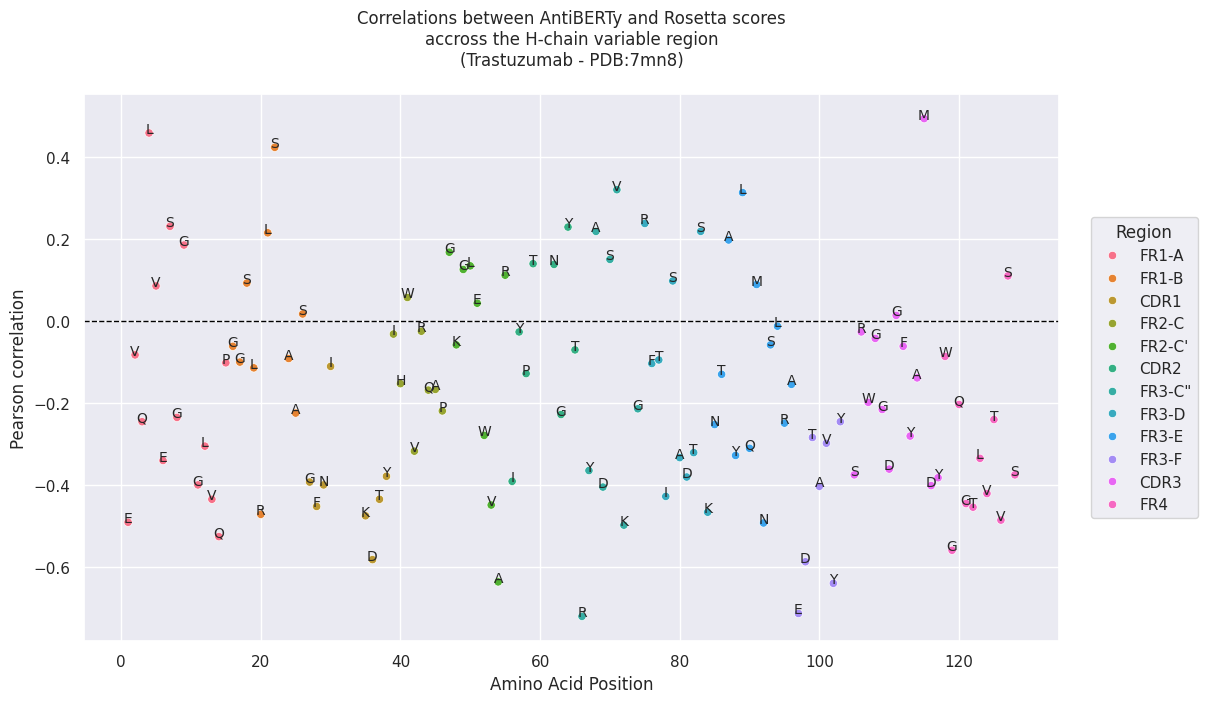

In [9]:
sns.set_theme()

plt.title(f"Correlations between AntiBERTy and Rosetta scores\n" 
             f"accross the H-chain variable region\n"
                    f"(Trastuzumab - PDB:7mn8)\n")

# sns.scatterplot(data = chain_H_correlation_df, x = "IMGT numbering", y = "Pearson correlation", hue = "Region", ax=axes[0])
# for i, row in chain_H_correlation_df.iterrows():
#     axes[0].text(row["IMGT numbering"], row["Pearson correlation"], row["Amino acid"], fontsize=9, ha="center")
    
# axes[0].set_xlabel("Amino Acid Position")
# axes[0].set_ylabel("Pearson correlation")
# axes[0].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
# axes[0].legend(bbox_to_anchor=(1.2, 0.5), loc = "right", title = "Region")

sns.scatterplot(data = chain_H_correlation_df, x = "IMGT numbering", y = "Spearman correlation", hue = "Region")
for i, row in chain_H_correlation_df.iterrows():
    plt.text(row["IMGT numbering"], row["Spearman correlation"], row["Amino acid"], fontsize=10, ha="center")
plt.xlabel("Amino Acid Position")
plt.ylabel("Pearson correlation")
plt.axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
plt.legend(bbox_to_anchor=(1.15, 0.5), loc = "right", title = "Region")

plt.tight_layout(rect=[0, 0, 1.8, 1.5]) 
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files"
plt.savefig(f"{output_folder}/HV_correlations_across_chain.png", bbox_inches="tight")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


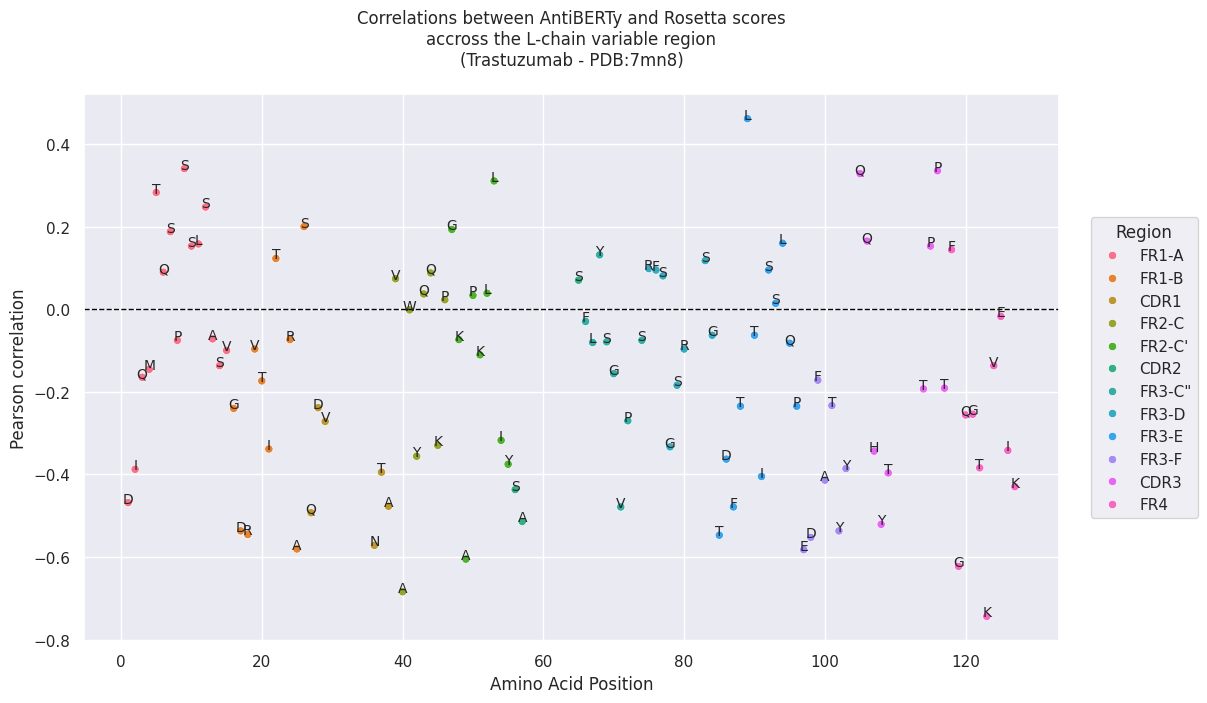

In [10]:
sns.set_theme()
# 
# fig, axes = plt.subplots(2,1, figsize=(9,10), sharex=False)

plt.title(f"Correlations between AntiBERTy and Rosetta scores\n" 
             f"accross the L-chain variable region\n"
                    f"(Trastuzumab - PDB:7mn8)\n")

# sns.scatterplot(data = chain_L_correlation_df, x = "IMGT numbering", y = "Pearson correlation", hue = "Region", ax=axes[0])
# for i, row in chain_L_correlation_df.iterrows():
#     axes[0].text(row["IMGT numbering"], row["Pearson correlation"], row["Amino acid"], fontsize=9, ha="center")
# axes[0].set_xlabel("Amino Acid Position")
# axes[0].set_ylabel("Pearson correlation")
# axes[0].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
# axes[0].legend(bbox_to_anchor=(1.2, 0.5), loc = "right", title = "Region")

sns.scatterplot(data = chain_L_correlation_df, x = "IMGT numbering", y = "Spearman correlation", hue = "Region")
for i, row in chain_L_correlation_df.iterrows():
    plt.text(row["IMGT numbering"], row["Spearman correlation"], row["Amino acid"], fontsize=10, ha="center")
plt.xlabel("Amino Acid Position")
plt.ylabel("Pearson correlation")
plt.axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
plt.legend(bbox_to_anchor=(1.15, 0.5), loc = "right", title = "Region")

plt.tight_layout(rect=[0, 0, 1.8, 1.5]) 
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files"
plt.savefig(f"{output_folder}/LV_correlations_across_chain.png", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

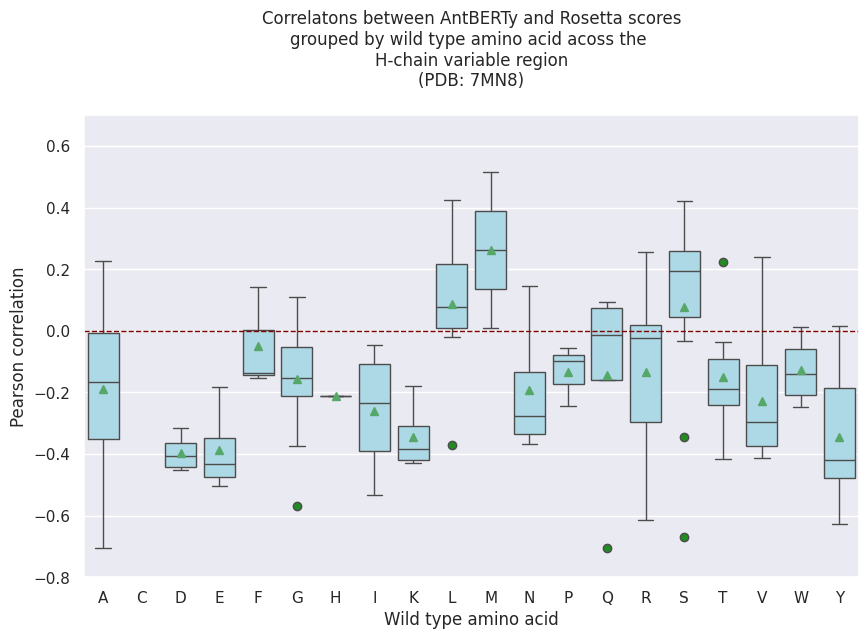

In [11]:
input_L_chain = ("Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Chains/chain_L_correlations.csv", "L")
input_H_chain = ("Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Chains/chain_H_correlations.csv", "H")
        
def get_correlations_for_each_position(df, chain_type):
    correlation_list = []
    for amino_acid, row in df.iterrows():
        correlation_list.append({
            "Amino acid": row["Amino acid"],
            "Position": row["IMGT numbering"],
            "Pearson correlation": row["Pearson correlation"],
            "Spearman correlations": row["Spearman correlations"]
        })
    return pd.DataFrame(correlation_list)

def get_sample_data(df, chain_type):
    plt.clf()
    plt.figure(figsize=(10,6))
    sns.set_theme()
    sns.boxplot(
        x="Amino acid",
        y="Pearson correlation",
        showmeans = True, patch_artist=True, boxprops= dict(facecolor = "lightblue"), flierprops= dict(markerfacecolor = "forestgreen"),
        data = df.sort_values(by=["Amino acid"], ascending= True)
    )

    plt.xlabel("Wild type amino acid")
    plt.ylabel("Pearson correlation")
    plt.ylim([-0.8, 0.7])
    plt.axhline(y=0, color = "maroon", linestyle = "--", linewidth = 1)
    plt.title(f"Correlatons between AntBERTy and Rosetta scores\n"
    f"grouped by wild type amino acid acoss the \n"
    f"{chain_type}-chain variable region\n"
    f"(PDB: 7MN8)\n")
    plt.savefig(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/{chain_type}V_correlations_grouped_by_WT_AA_boxplot.png", bbox_inches="tight")

for input_chain in [input_L_chain, input_H_chain]:
    input_path, chain_type = input_chain
    df = pd.read_csv(input_path)
    get_sample_data(df, chain_type)

# Group by amino acid group
take the above code (which produced the boxplot) and then group it by the amino acid grour (e.g. hydrophobic)

/tmp/ipykernel_2071001/380381713.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'negative' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, "amino_acid_group"] = "negative"
/tmp/ipykernel_2071001/380381713.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'negative' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, "amino_acid_group"] = "negative"


<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

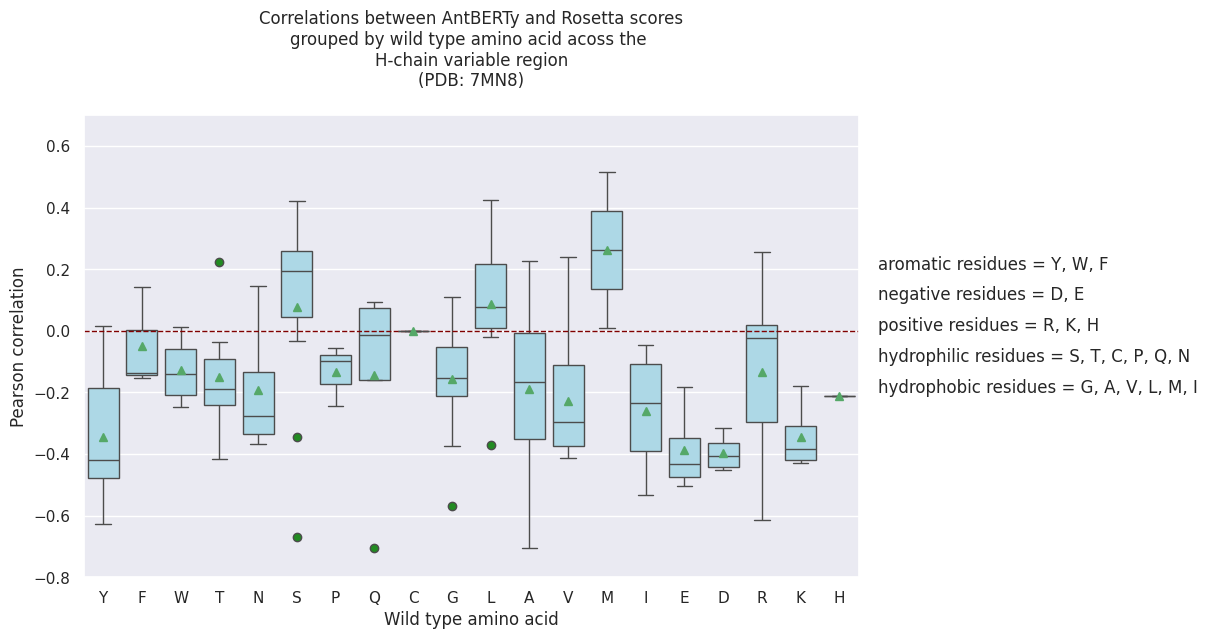

In [12]:
input_L_chain = ("Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Chains/chain_L_correlations.csv", "L")
input_H_chain = ("Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Chains/chain_H_correlations.csv", "H")

aromatic_residues = ['Y', 'W', 'F']
negative_residues = ['D', 'E']
positive_residues = ['R', 'K', 'H']
hydrophilic_residues = ['S', 'T', 'C', 'P', 'Q', 'N']
hydrophobic_residues = ['G', 'A', 'V', 'L', 'M', 'I']

def assign_amino_acid_group(df):
    for index, row in df.iterrows():
        amino_acid = row["Amino acid"]
        if amino_acid in aromatic_residues:
            df.at[index, "amino_acid_group"] = "aromatic"
        elif amino_acid in negative_residues:
            df.at[index, "amino_acid_group"] = "negative"
        elif amino_acid in positive_residues:
            df.at[index, "amino_acid_group"] = "positive"
        elif amino_acid in hydrophilic_residues:
            df.at[index, "amino_acid_group"] = "hydrophilic"
        elif amino_acid in hydrophobic_residues:
            df.at[index, "amino_acid_group"] = "hydrophobic"
        else:
            df.at[index, "amino_acid_group"] = "unknown"

    for index, row in df.iterrows():
        if pd.isna(row["Pearson correlation"]):
            df.at[index, "Pearson correlation"] = 0
        else:
            pass
    return df
    
    

def get_sample_data(df, chain_type):
    plt.clf()
    data = df.sort_values(by=["amino_acid_group"], ascending= True)     
    plt.figure(figsize=(10,6))
    sns.set_theme()
    sns.boxplot(
        x=data["Amino acid"],
        y=data["Pearson correlation"],
        showmeans = True, patch_artist=True, boxprops= dict(facecolor = "lightblue"), flierprops= dict(markerfacecolor = "forestgreen"))

    plt.xlabel("Wild type amino acid")
    plt.ylabel("Pearson correlation")
    plt.ylim([-0.8, 0.7])
    plt.axhline(y=0, color = "maroon", linestyle = "--", linewidth = 1)
    plt.text(20, 0.2, f"aromatic residues = {', '.join(aromatic_residues)}")
    plt.text(20, 0.1, f"negative residues = {', '.join(negative_residues)}")
    plt.text(20, 0.0, f"positive residues = {', '.join(positive_residues)}")
    plt.text(20, -0.1, f"hydrophilic residues = {', '.join(hydrophilic_residues)}")
    plt.text(20, -0.2, f"hydrophobic residues = {', '.join(hydrophobic_residues)}")

    plt.title(f"Correlations between AntBERTy and Rosetta scores\n"
    f"grouped by wild type amino acid acoss the \n"
    f"{chain_type}-chain variable region\n"
    f"(PDB: 7MN8)\n")
    plt.savefig(f"Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files/{chain_type}V_correlations_grouped_by_WT_AA_boxplot.png", bbox_inches="tight")

for input_chain in [input_L_chain, input_H_chain]:
    input_path, chain_type = input_chain 
    df = pd.read_csv(input_path)
    df = assign_amino_acid_group(df)
    get_sample_data(df, chain_type)

# WT amino acid grouping
group amino acids in the sequence to see if they agree on based on amino acid type or if the location of the amino acid matters more

In [13]:
"""
Work with Trastuzumab 
group datframes by position (using IMGT numbering scheme) - THESE ARE NOT SEPARATED BY CHAIN YET
split the dataframes by chain and put them in separate dataframes (for easier access)
calculate the correlations - to see both linear(pearson_correlation) and non-linear(spearman_correlation) trends 
calculate the variabilitya and standard deviation 

for the "get_correlations_at_each_position" function:
- we use .iloc[0] to get the very first value of the dataframe. This is because when we calculate the correlations,
the function will result in the same values put in every single row of the dataframe. 
e.g. WT_AA | pearson corr ...
      D          0.5
      D          0.5
      
- because the values are the same there is no point in putting this all into the new dataframe 
- so we can use iloc function to only get the top row, essentially summarising this info
"""

output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Chains"
# Trastuzumab = dataframes["7mn8_DC"]

correlations_WT_AA_chainH = {}
correlations_WT_AA_chainL = {}
chain_H_correlation = []
chain_L_correlation = []

# group by chain
def chain_separation(df, group):
    correlations_WT_AA_chainH[f"{group}"] = df[df["chain"] == "H"]
    correlations_WT_AA_chainL[f"{group}"] = df[df["chain"] == "L"]

# calculate correlations
def calculate_correlations_pos(df):
    df["pearson_correlation"] = df["AntiBERTy normalised"].corr(df["Rosetta normalised"])
    df["spearman_correlation"] = df["AntiBERTy normalised"].corr(df["Rosetta normalised"], method="spearman")
    df["variance"] = np.var(df["AntiBERTy normalised"] - df["Rosetta normalised"])
    df["std_dev"] = np.sqrt(df["variance"])
    
    return df

def get_correlations_at_each_position(df, WT_AA_list):
    WT_AA_list.append({
        "Amino acid": df["WT_AA"].iloc[0],
        "Pearson correlation": df["pearson_correlation"].iloc[0],
        "Spearman correlation": df["spearman_correlation"].iloc[0]
    })

def save_correlations_df(df, output_folder, chain_type):
    df.to_csv(os.path.join(output_folder, f"chain_{chain_type}_correlations_by_WT_AA_type.csv"), index = False)

# group by position
for WT_AA, group in Trastuzumab.groupby("WT_AA"):
    chain_separation(group, WT_AA)

for group, df in correlations_WT_AA_chainH.items():
    correlations_WT_AA_chainH[group] = calculate_correlations_pos(df)
    get_correlations_at_each_position(df, chain_H_correlation)
chain_H_correlation_by_WT_AA_type_df = pd.DataFrame(chain_H_correlation)
save_correlations_df(chain_H_correlation_by_WT_AA_type_df, output_folder, "H")

for group, df in correlations_WT_AA_chainL.items():
    correlations_WT_AA_chainL[group] = calculate_correlations_pos(df)
    get_correlations_at_each_position(df, chain_L_correlation) 
chain_L_correlation_by_WT_AA_type_df = pd.DataFrame(chain_L_correlation)
save_correlations_df(chain_L_correlation_by_WT_AA_type_df, output_folder, "L")

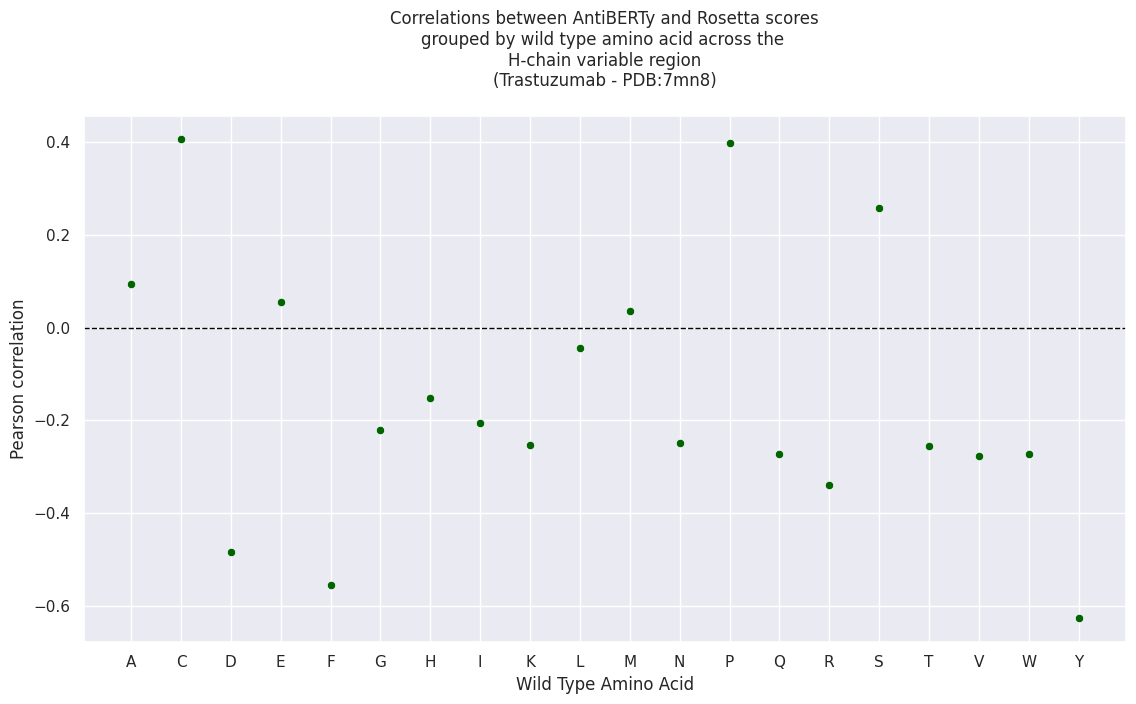

In [14]:
sns.set_theme()

plt.title(f"Correlations between AntiBERTy and Rosetta scores\n" 
             f"grouped by wild type amino acid across the \n"
                    f"H-chain variable region\n"
                    f"(Trastuzumab - PDB:7mn8)\n")

# sns.scatterplot(data = chain_H_correlation_df, x = "Amino acid", y = "Pearson correlation", color="black", ax=axes[0])
# axes[0].set_xlabel("Amino Acid")
# axes[0].set_ylabel("Pearson correlation")
# axes[0].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)

sns.scatterplot(data = chain_H_correlation_by_WT_AA_type_df, x = "Amino acid", y = "Spearman correlation", color="darkgreen")
plt.xlabel("Wild Type Amino Acid")
plt.ylabel("Pearson correlation")
plt.axhline(y=0, color = "black", linestyle = "--", linewidth = 1)

plt.tight_layout(rect=[0, 0, 1.8, 1.5]) 
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files"
plt.savefig(f"{output_folder}/HV_WT_AA_correlations_across_chain.png", bbox_inches="tight")

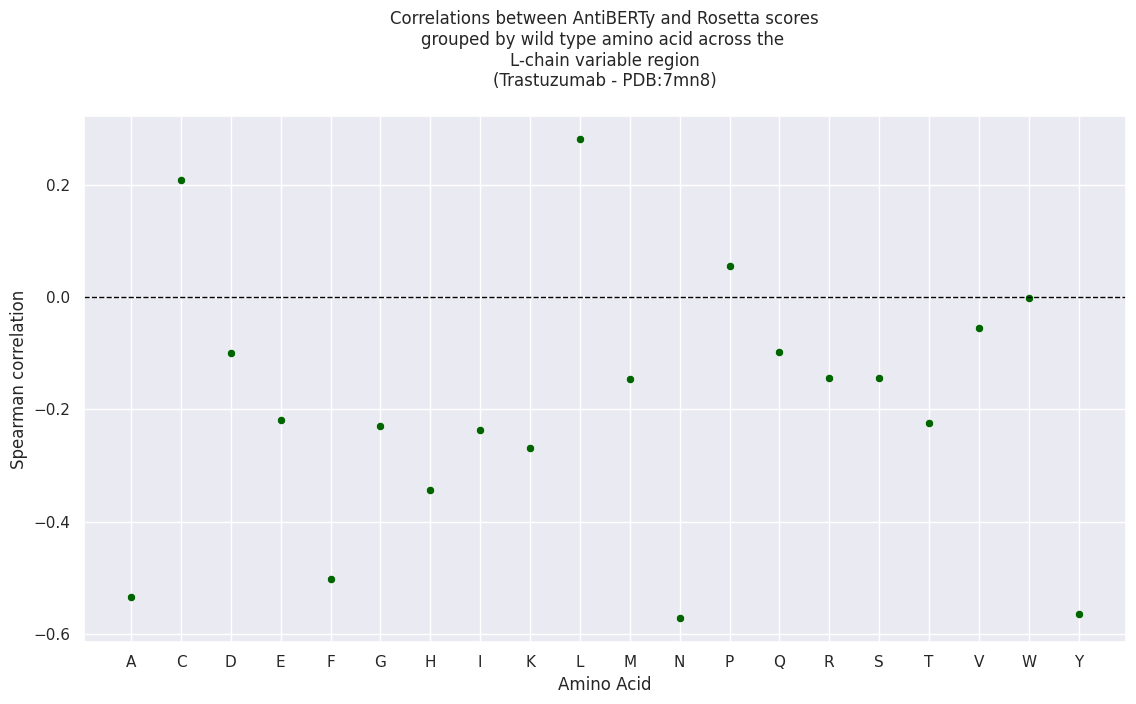

In [15]:
sns.set_theme()

plt.title(f"Correlations between AntiBERTy and Rosetta scores\n" 
             f"grouped by wild type amino acid across the \n"
                    f"L-chain variable region\n"
                    f"(Trastuzumab - PDB:7mn8)\n")

# sns.scatterplot(data = chain_L_correlation_df, x = "Amino acid", y = "Pearson correlation", color="black", ax=axes[0])
# axes[0].set_xlabel("Amino Acid")
# axes[0].set_ylabel("Pearson correlation")
# axes[0].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)

sns.scatterplot(data = chain_L_correlation_by_WT_AA_type_df, x = "Amino acid", y = "Spearman correlation", color="darkgreen")
plt.xlabel("Amino Acid")
plt.ylabel("Spearman correlation")
plt.axhline(y=0, color = "black", linestyle = "--", linewidth = 1)

plt.tight_layout(rect=[0, 0, 1.8, 1.5]) 
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files"
plt.savefig(f"{output_folder}/LV_WT_AA_correlations_across_chain.png", bbox_inches="tight")

## Split score into dataframes 
if they are positive, negative or one positive and another negative

In [16]:
"""
to split the amino acids substitution based on their scores (positive vs negative)
similar to previous functions, we make use of lists to save the infomation, since we want to save this for later.
"""
# Trastuzumab = dataframes["7mn8_DC"]
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/All amino acids"

positive_values_list = []
antiberty_pos_rosetta_neg_list = []
rosetta_pos_antiberty_neg_list = []
negative_values_list = []

for index, row in Trastuzumab.iterrows():
    AntiBERTy_normalised = row["AntiBERTy normalised"]
    Rosetta_normalised = row["Rosetta normalised"]

    positive_condition = AntiBERTy_normalised > 0 and Rosetta_normalised > 0 
    antiberty_pos_rosetta_neg_condition = AntiBERTy_normalised > 0 and Rosetta_normalised < 0 
    rosetta_pos_antiberty_neg_condition = AntiBERTy_normalised < 0 and Rosetta_normalised > 0
    negative_condition = AntiBERTy_normalised < 0 and Rosetta_normalised < 0

    if positive_condition:
        positive_values_list.append({
            "Chain": row["chain"],
            "Region": row["region"],
            "Position": row["position"],
            "WT_AA": row["WT_AA"],
            "MUT_AA": row["MUT_AA"],
            "AntiBERTy_normalised": AntiBERTy_normalised,
            "Rosetta_normalised": Rosetta_normalised
        })
        
    elif antiberty_pos_rosetta_neg_condition:
        antiberty_pos_rosetta_neg_list.append({
            "Chain": row["chain"],
            "Region": row["region"],
            "Position": row["position"],
            "WT_AA": row["WT_AA"],
            "MUT_AA": row["MUT_AA"],
            "AntiBERTy_normalised": AntiBERTy_normalised,
            "Rosetta_normalised": Rosetta_normalised
        })

    elif rosetta_pos_antiberty_neg_condition:
        rosetta_pos_antiberty_neg_list.append({
            "Chain": row["chain"],
            "Region": row["region"],
            "Position": row["position"],
            "WT_AA": row["WT_AA"],
            "MUT_AA": row["MUT_AA"],
            "AntiBERTy_normalised": AntiBERTy_normalised,
            "Rosetta_normalised": Rosetta_normalised
        })

    elif negative_condition:
        negative_values_list.append({
            "Chain": row["chain"],
            "Region": row["region"],
            "Position": row["position"],
            "WT_AA": row["WT_AA"],
            "MUT_AA": row["MUT_AA"],
            "AntiBERTy_normalised": AntiBERTy_normalised,
            "Rosetta_normalised": Rosetta_normalised
        })


positive_correlation_df = pd.DataFrame(positive_values_list)
antiberty_pos_rosetta_neg_df = pd.DataFrame(antiberty_pos_rosetta_neg_list) 
rosetta_pos_antiberty_neg_df = pd.DataFrame(rosetta_pos_antiberty_neg_list) 
negative_correlation_df = pd.DataFrame(negative_values_list)

positive_correlation_df.to_csv(f"{output_folder}/positive_scores.csv", index= False)
antiberty_pos_rosetta_neg_df.to_csv(f"{output_folder}/antiberty_pos_rosetta_neg_scores.csv", index= False)
rosetta_pos_antiberty_neg_df.to_csv(f"{output_folder}/antiberty_neg_rosetta_pos_scores.csv", index= False)
negative_correlation_df.to_csv(f"{output_folder}/negative_scores.csv", index= False)

# Agree vs disagree dataframes (based on amino acid type)
Split the rows (amino acid substitution) based on the amino acid type substitution and conditions (being both positive, negative etc.)

In [17]:
# Trastuzumab = dataframes["7mn8_DC"]
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Amino acid type (WT)"

aromatic_residues = ['Y', 'W', 'F']
negative_residues = ['D', 'E']
positive_residues = ['R', 'K', 'H']
hydrophilic_residues = ['S', 'T', 'C', 'P', 'Q', 'N']
hydrophobic_residues = ['G', 'A', 'V', 'L', 'M', 'I']

positive_values_list = []
antiberty_pos_rosetta_neg_list = []
rosetta_pos_antiberty_neg_list = []
negative_values_list = []

for index, row in Trastuzumab.iterrows():
    WT_AA = row["WT_AA"]
    MUT_AA = row["MUT_AA"]
    AntiBERTy_normalized = row["AntiBERTy normalised"]
    Rosetta_normalized = row["Rosetta normalised"]
    
    # both scores are positive
    positive_condition = (
        ((WT_AA in aromatic_residues) and (MUT_AA in aromatic_residues)) or
        ((WT_AA in negative_residues) and (MUT_AA in negative_residues)) or
        ((WT_AA in positive_residues) and (MUT_AA in positive_residues)) or
        ((WT_AA in hydrophilic_residues) and (MUT_AA in hydrophilic_residues)) or
        ((WT_AA in hydrophobic_residues) and (MUT_AA in hydrophobic_residues))
    ) and (AntiBERTy_normalized > 0) and (Rosetta_normalized > 0)

    # only AntiBERTy scores are positive
    antiberty_pos_rosetta_neg = (
        ((WT_AA in aromatic_residues) and (MUT_AA in aromatic_residues)) or
        ((WT_AA in negative_residues) and (MUT_AA in negative_residues)) or
        ((WT_AA in positive_residues) and (MUT_AA in positive_residues)) or
        ((WT_AA in hydrophilic_residues) and (MUT_AA in hydrophilic_residues)) or
        ((WT_AA in hydrophobic_residues) and (MUT_AA in hydrophobic_residues))
    ) and (AntiBERTy_normalized > 0) and (Rosetta_normalized < 0)

    # only Rosetta scores are positive
    rosetta_pos_antiberty_neg = (
        ((WT_AA in aromatic_residues) and (MUT_AA in aromatic_residues)) or
        ((WT_AA in negative_residues) and (MUT_AA in negative_residues)) or
        ((WT_AA in positive_residues) and (MUT_AA in positive_residues)) or
        ((WT_AA in hydrophilic_residues) and (MUT_AA in hydrophilic_residues)) or
        ((WT_AA in hydrophobic_residues) and (MUT_AA in hydrophobic_residues))
    ) and (AntiBERTy_normalized < 0) and (Rosetta_normalized > 0)

    # both scores are negative
    negative_condition = (
        ((WT_AA in aromatic_residues) and (MUT_AA in aromatic_residues)) or
        ((WT_AA in negative_residues) and (MUT_AA in negative_residues)) or
        ((WT_AA in positive_residues) and (MUT_AA in positive_residues)) or
        ((WT_AA in hydrophilic_residues) and (MUT_AA in hydrophilic_residues)) or
        ((WT_AA in hydrophobic_residues) and (MUT_AA in hydrophobic_residues))
    ) and (AntiBERTy_normalized < 0) and (Rosetta_normalized < 0)
 
    if positive_condition:
        positive_values_list.append({
            "Chain": row["chain"],
            "Region": row["region"],
            "Position": row["position"],
            "WT_AA": WT_AA,
            "MUT_AA": MUT_AA,
            "AntiBERTy_normalised": AntiBERTy_normalized,
            "Rosetta_normalised": Rosetta_normalized
        })
        
    elif antiberty_pos_rosetta_neg:
        antiberty_pos_rosetta_neg_list.append({
            "Chain": row["chain"],
            "Region": row["region"],
            "Position": row["position"],
            "WT_AA": WT_AA,
            "MUT_AA": MUT_AA,
            "AntiBERTy_normalised": AntiBERTy_normalized,
            "Rosetta_normalised": Rosetta_normalized
        })

    elif rosetta_pos_antiberty_neg:
        rosetta_pos_antiberty_neg_list.append({
            "Chain": row["chain"],
            "Region": row["region"],
            "Position": row["position"],
            "WT_AA": WT_AA,
            "MUT_AA": MUT_AA,
            "AntiBERTy_normalised": AntiBERTy_normalized,
            "Rosetta_normalised": Rosetta_normalized
        })

    elif negative_condition:
        negative_values_list.append({
            "Chain": row["chain"],
            "Region": row["region"],
            "Position": row["position"],
            "WT_AA": WT_AA,
            "MUT_AA": MUT_AA,
            "AntiBERTy_normalised": AntiBERTy_normalized,
            "Rosetta_normalised": Rosetta_normalized
        })

positive_correlation_df = pd.DataFrame(positive_values_list)
antiberty_pos_rosetta_neg_df = pd.DataFrame(antiberty_pos_rosetta_neg_list) 
rosetta_pos_antiberty_neg_df = pd.DataFrame(rosetta_pos_antiberty_neg_list) 
negative_correlation_df = pd.DataFrame(negative_values_list)

positive_correlation_df.to_csv("positive_correlation_df.csv", index= False)
antiberty_pos_rosetta_neg_df.to_csv("antiberty_pos_rosetta_neg_df.csv", index= False)
rosetta_pos_antiberty_neg_df.to_csv("rosetta_pos_antiberty_neg_df.csv", index= False)
negative_correlation_df.to_csv("negative_correlation_df.csv", index= False)

# MUT_AA amino acid preference

In [18]:
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_correlations-DF/Amino acid type (MUT)"
# Trastuzumab = dataframes["7mn8_DC"]

correlations_MUT_AA_H = {}
correlations_MUT_AA_L = {}
chain_H_correlation = []
chain_L_correlation = []

# group by chain
def chain_separation(df, group):
    correlations_MUT_AA_H[f"{group}"] = df[df["chain"] == "H"]
    correlations_MUT_AA_L[f"{group}"] = df[df["chain"] == "L"]

def calculate_correlations_aa(df):
    df["pearson_correlation"] = df["AntiBERTy normalised"].corr(df["Rosetta normalised"])
    df["spearman_correlation"] = df["AntiBERTy normalised"].corr(df["Rosetta normalised"], method="spearman")
    df["variance"] = np.var(df["AntiBERTy normalised"] - df["Rosetta normalised"])
    df["std_dev"] = np.sqrt(df["variance"])
    
    return df

def get_correlations_for_MUT_AA(group, amino_acid_list):
    amino_acid_list.append({
        "Amino acid": df["MUT_AA"].iloc[0],
        "Pearson correlation": df["pearson_correlation"].iloc[0],
        "Spearman correlation": df["spearman_correlation"].iloc[0]
    })


# group by MUT_AA
for MUT_AA, group in Trastuzumab.groupby("MUT_AA"):
    chain_separation(group, MUT_AA)

for group, df in correlations_MUT_AA_H.items():
    correlations_MUT_AA_H[group] = calculate_correlations_aa(df)
    get_correlations_for_MUT_AA(df, chain_H_correlation)
chain_H_correlation_by_MUT_AA_type_df = pd.DataFrame(chain_H_correlation)
save_correlations_df(chain_H_correlation_by_MUT_AA_type_df, output_folder, "H")

for group, df in correlations_MUT_AA_L.items():
    correlations_MUT_AA_L[group] = calculate_correlations_aa(df)
    get_correlations_for_MUT_AA(df, chain_L_correlation) 
chain_L_correlation_by_MUT_AA_type_df = pd.DataFrame(chain_L_correlation)
save_correlations_df(chain_L_correlation_by_MUT_AA_type_df, output_folder, "L")

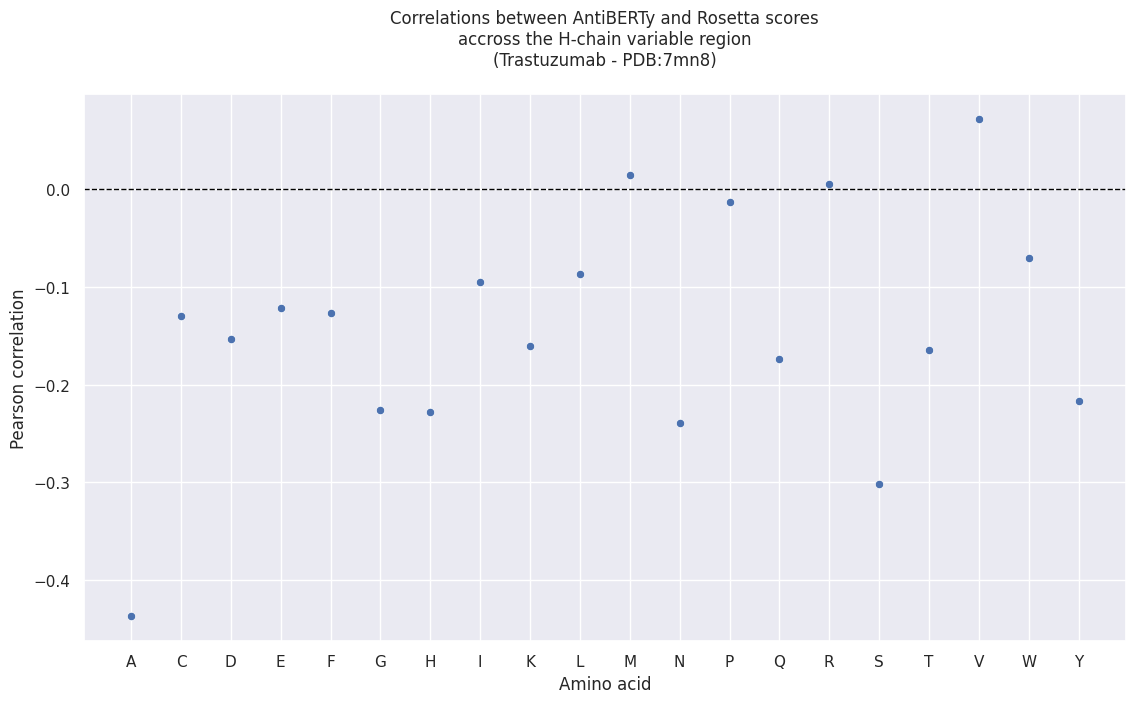

In [19]:
sns.set_theme()

# fig, axes = plt.subplots(2,1, figsize=(5,7), sharex=False)

plt.title(f"Correlations between AntiBERTy and Rosetta scores\n" 
             f"accross the H-chain variable region\n"
                    f"(Trastuzumab - PDB:7mn8)\n")

sns.scatterplot(data = chain_H_correlation_by_MUT_AA_type_df, x = "Amino acid", y = "Pearson correlation")
plt.xlabel("Amino acid")
plt.ylabel("Pearson correlation")
plt.axhline(y=0, color = "black", linestyle = "--", linewidth = 1)

# sns.scatterplot(data = chain_H_correlation_by_MUT_AA_type_df, x = "Amino acid", y = "Spearman correlation", ax=axes[1])
# axes[1].set_xlabel("Amino acid")
# axes[1].set_ylabel("Spearman correlation")
# axes[1].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)


plt.tight_layout(rect=[0, 0, 1.8, 1.5]) 
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files"
plt.savefig(f"{output_folder}/HV_MUT_AA_correlations")

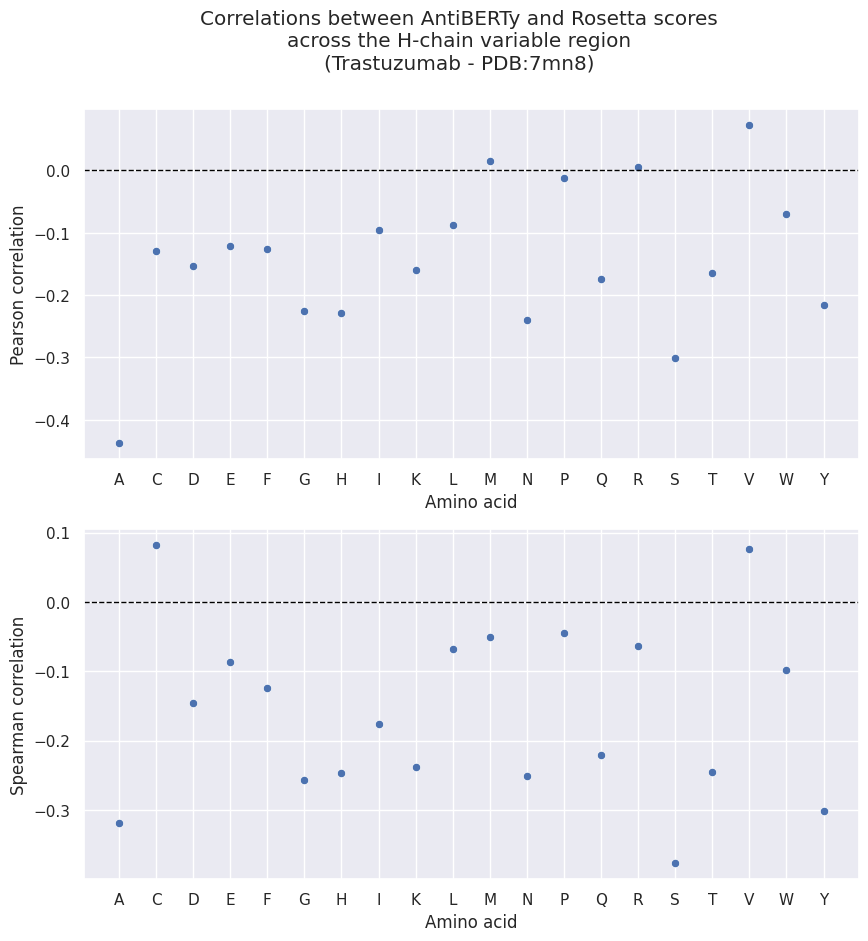

In [20]:
"""
the code below does the same thing as above but also includes the Spearman correlations
"""
sns.set_theme()

fig, axes = plt.subplots(2,1, figsize=(10,10), sharex=False)

plt.suptitle("Correlations between AntiBERTy and Rosetta scores\n" 
             "across the H-chain variable region\n"
             "(Trastuzumab - PDB:7mn8)")

sns.scatterplot(data = chain_H_correlation_by_MUT_AA_type_df, x = "Amino acid", y = "Pearson correlation", ax=axes[0])
axes[0].set_xlabel("Amino acid")
axes[0].set_ylabel("Pearson correlation")
axes[0].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)

sns.scatterplot(data = chain_H_correlation_by_MUT_AA_type_df, x = "Amino acid", y = "Spearman correlation", ax=axes[1])
axes[1].set_xlabel("Amino acid")
axes[1].set_ylabel("Spearman correlation")
axes[1].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)


# plt.tight_layout(rect=[0, 0, 1.8, 1.5]) 
# output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files"
# plt.savefig(f"{output_folder}/HV_MUT_AA_correlations")

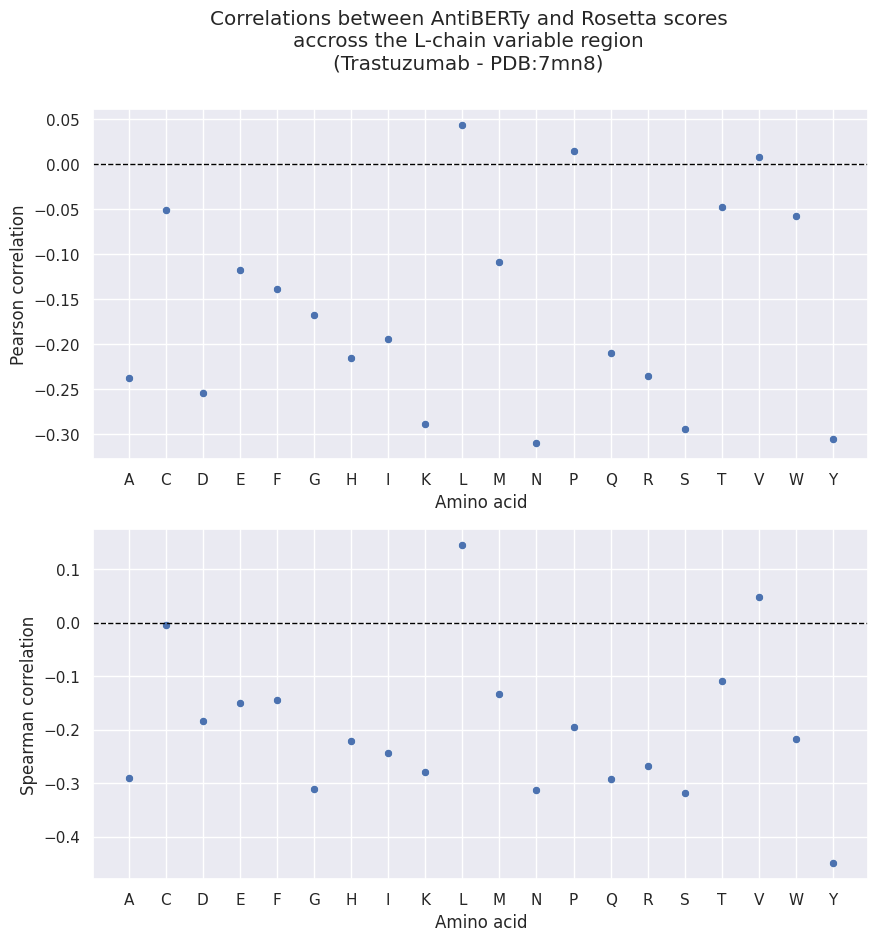

In [21]:
sns.set_theme()

fig, axes = plt.subplots(2,1, figsize=(10,10), sharex=False)

plt.suptitle(f"Correlations between AntiBERTy and Rosetta scores\n" 
             f"accross the L-chain variable region\n"
                    f"(Trastuzumab - PDB:7mn8)\n")

sns.scatterplot(data = chain_L_correlation_by_MUT_AA_type_df, x = "Amino acid", y = "Pearson correlation", ax=axes[0])
axes[0].set_xlabel("Amino acid")
axes[0].set_ylabel("Pearson correlation")
axes[0].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)

sns.scatterplot(data = chain_L_correlation_by_MUT_AA_type_df, x = "Amino acid", y = "Spearman correlation", ax=axes[1])
axes[1].set_xlabel("Amino acid")
axes[1].set_ylabel("Spearman correlation")
axes[1].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)


# plt.tight_layout(rect=[0, 0, 1.8, 1.5]) 
# output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files"
# plt.savefig(f"{output_folder}/LV_MUT_AA_correlations")

In [22]:
# Trastuzumab = dataframes["7mn8_DC"]

correlations_region = {}
correlations_region_MUT_AA = {}
correlations_region_AA_chainH = {}
correlations_region_AA_chainL = {}

for region, group in Trastuzumab.groupby("region"):
    correlations_region[region] = group

for custom_name, df in correlations_region.items():
    for amino_acid, group in df.groupby("MUT_AA"):
        correlations_region_MUT_AA[f"{custom_name}_{amino_acid}"] = group
    
def chain_separation(df):
    for chain, group in df.groupby("chain"):
        if chain == "H":
            correlations_region_AA_chainH[f"{amino_acid}"] = group
        elif chain == "L":
            correlations_region_AA_chainL[f"{amino_acid}"] = group

for amino_acid, df in correlations_region_MUT_AA.items():
    chain_separation(df)

def calculate_correlations_region_aa(df):
    df["pearson_correlation"] = df["AntiBERTy normalised"].corr(df["Rosetta normalised"])
    df["spearman_correlation"] = df["AntiBERTy normalised"].corr(df["Rosetta normalised"], method="spearman")
    df["variance"] = np.var(df["AntiBERTy normalised"] - df["Rosetta normalised"])
    df["std_dev"] = np.sqrt(variance)
    
    return df

for custom_name, df in correlations_region_AA_chainH.items():
    correlations_region_AA_chainH[custom_name] = calculate_correlations_region_aa(df)

for custom_name, df in correlations_region_AA_chainL.items():
    correlations_region_AA_chainL[custom_name] = calculate_correlations_region_aa(df)

/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/diancu/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [23]:
chain_H_correlation_region_aa = []
chain_L_correlation_region_aa = []

def get_correlations_for_region(df, amino_acid_list):
    amino_acid_list.append({
        "Amino acid": df["MUT_AA"].iloc[0],
        "Region": df["region"].iloc[0],
        "Pearson correlation": df["pearson_correlation"].iloc[0],
        "Spearman correlation": df["spearman_correlation"].iloc[0]
    })
    
for custom_name, df in correlations_region_AA_chainH.items():
    get_correlations_for_region(df, chain_H_correlation_region_aa)
chain_H_region_MUT_AA_correlation_df = pd.DataFrame(chain_H_correlation_region_aa)
    
for custom_name, df in correlations_region_AA_chainL.items():
    get_correlations_for_region(df, chain_L_correlation_region_aa) 
chain_L_region_MUT_AA_correlation_df = pd.DataFrame(chain_L_correlation_region_aa)

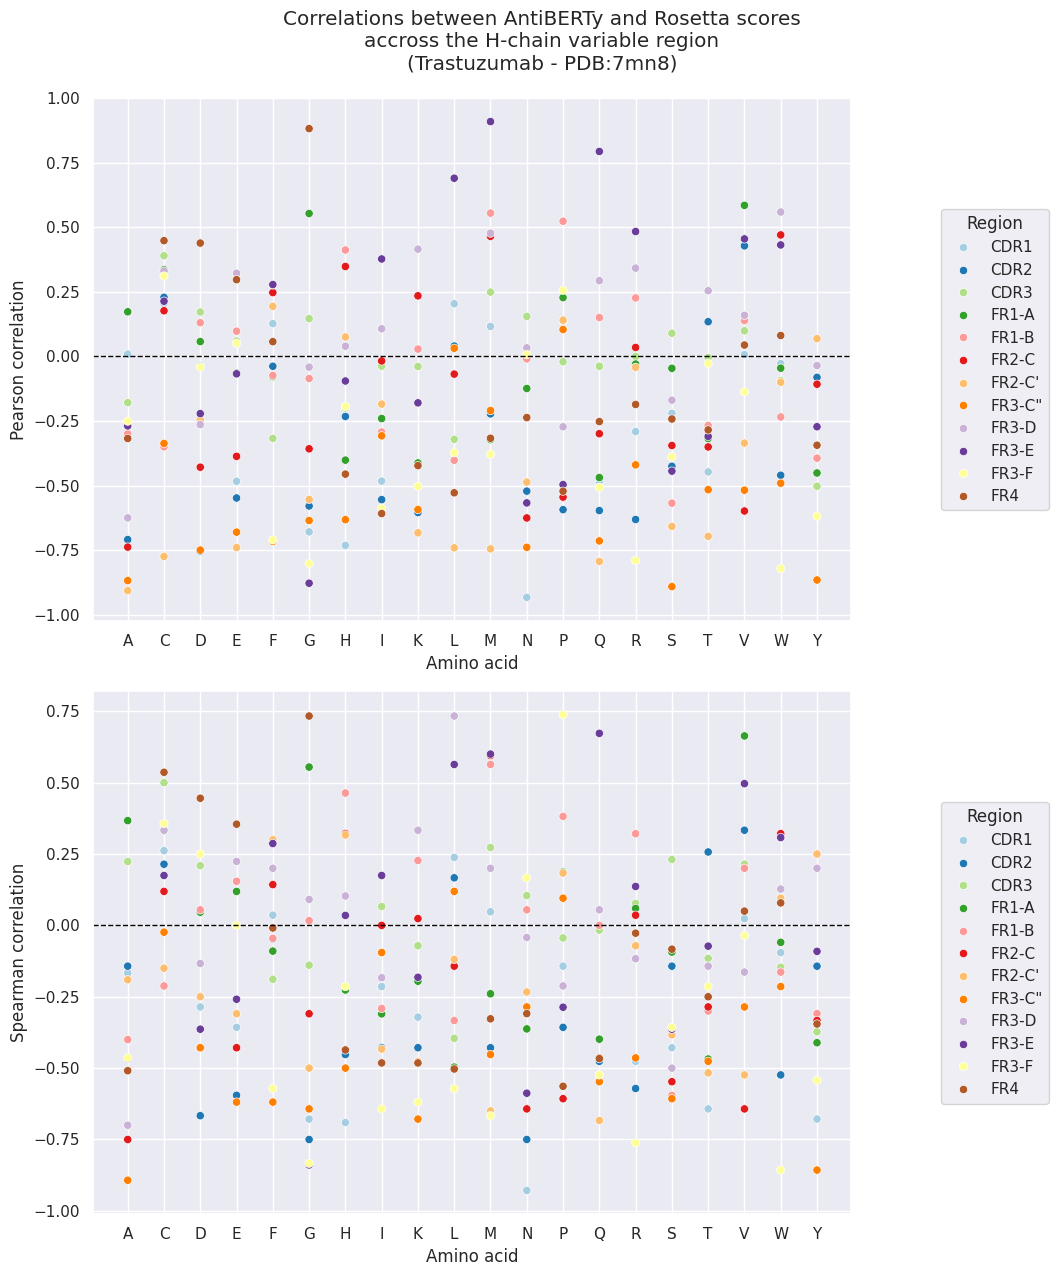

In [24]:
custom_palette = sns.color_palette("Paired", n_colors=12)

sns.set_theme()

fig, axes = plt.subplots(2,1, figsize=(11,13), sharex=False)

plt.suptitle(f"Correlations between AntiBERTy and Rosetta scores\n" 
             f"accross the H-chain variable region\n"
                    f"(Trastuzumab - PDB:7mn8)\n")

sns.scatterplot(data = chain_H_region_MUT_AA_correlation_df, x = "Amino acid", y = "Pearson correlation", hue="Region", ax=axes[0], palette=custom_palette)
axes[0].set_xlabel("Amino acid")
axes[0].set_ylabel("Pearson correlation")
axes[0].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
axes[0].legend(loc = "right", bbox_to_anchor=(1.27, 0.5), title = "Region")


sns.scatterplot(data = chain_H_region_MUT_AA_correlation_df, x = "Amino acid", y = "Spearman correlation", hue="Region", ax=axes[1], palette=custom_palette)
axes[1].set_xlabel("Amino acid")
axes[1].set_ylabel("Spearman correlation")
axes[1].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
axes[1].legend(loc = "right", bbox_to_anchor=(1.27, 0.5), title = "Region")


plt.tight_layout(rect=[0, 0, 1, 1.01]) 
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files"
plt.savefig(f"{output_folder}/HV_MUT_AA_correlations_across_region")

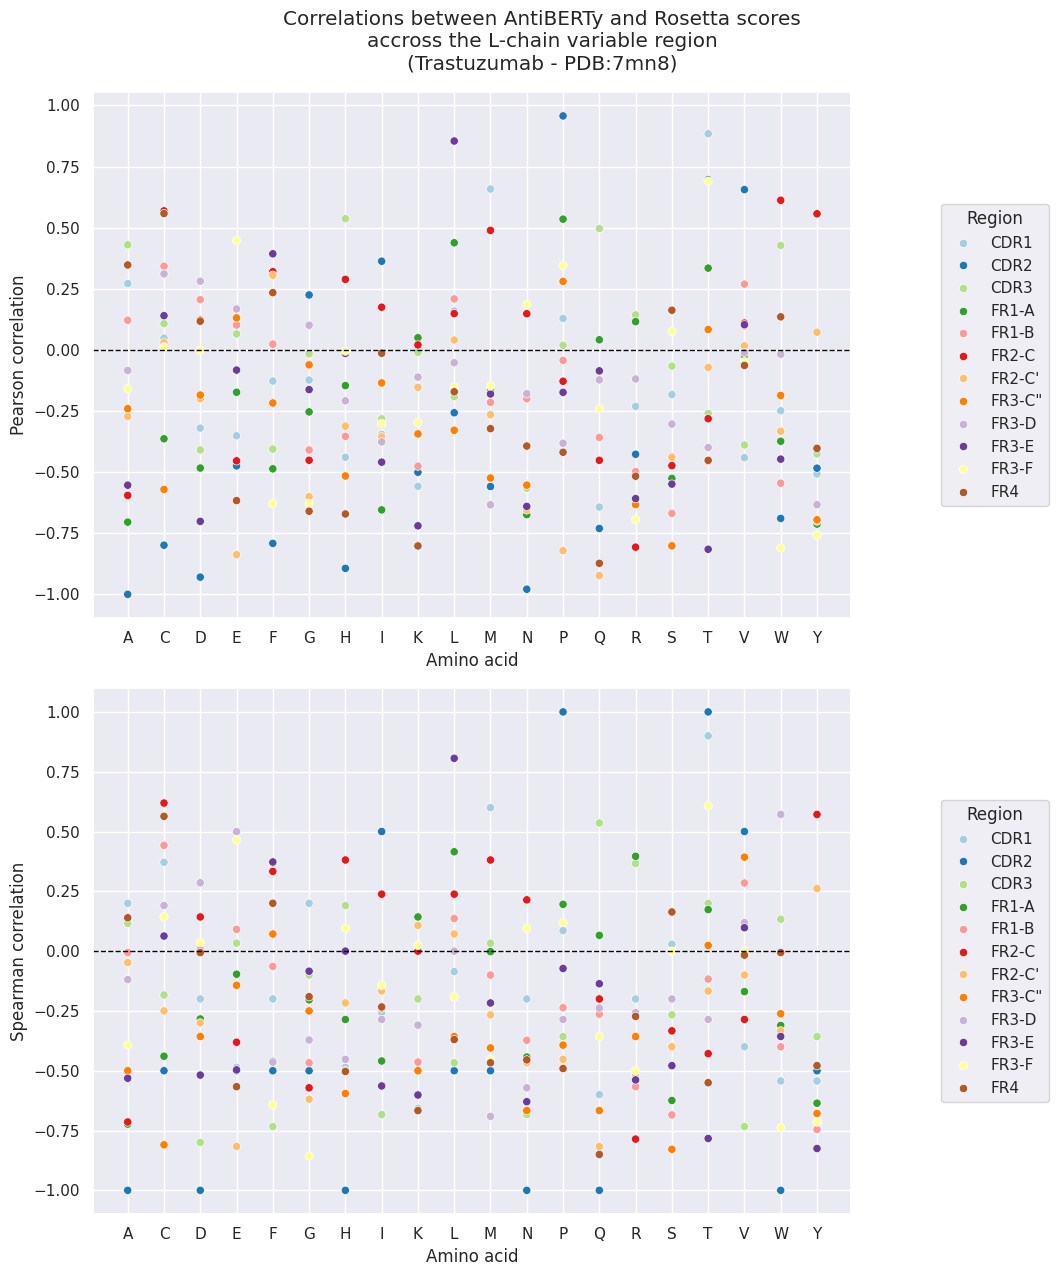

In [25]:
custom_palette = sns.color_palette("Paired", n_colors=12)

sns.set_theme()

fig, axes = plt.subplots(2,1, figsize=(11,13), sharex=False)

plt.suptitle(f"Correlations between AntiBERTy and Rosetta scores\n" 
             f"accross the L-chain variable region\n"
                    f"(Trastuzumab - PDB:7mn8)\n")

sns.scatterplot(data = chain_L_region_MUT_AA_correlation_df, x = "Amino acid", y = "Pearson correlation", hue="Region", ax=axes[0], palette=custom_palette)
axes[0].set_xlabel("Amino acid")
axes[0].set_ylabel("Pearson correlation")
axes[0].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
axes[0].legend(loc = "right", bbox_to_anchor=(1.27, 0.5), title = "Region")


sns.scatterplot(data = chain_L_region_MUT_AA_correlation_df, x = "Amino acid", y = "Spearman correlation", hue="Region", ax=axes[1], palette=custom_palette)
axes[1].set_xlabel("Amino acid")
axes[1].set_ylabel("Spearman correlation")
axes[1].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
axes[1].legend(loc = "right", bbox_to_anchor=(1.27, 0.5), title = "Region")


plt.tight_layout(rect=[0, 0, 1, 1.01]) 
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files"
plt.savefig(f"{output_folder}/LV_MUT_AA_correlations_across_region")

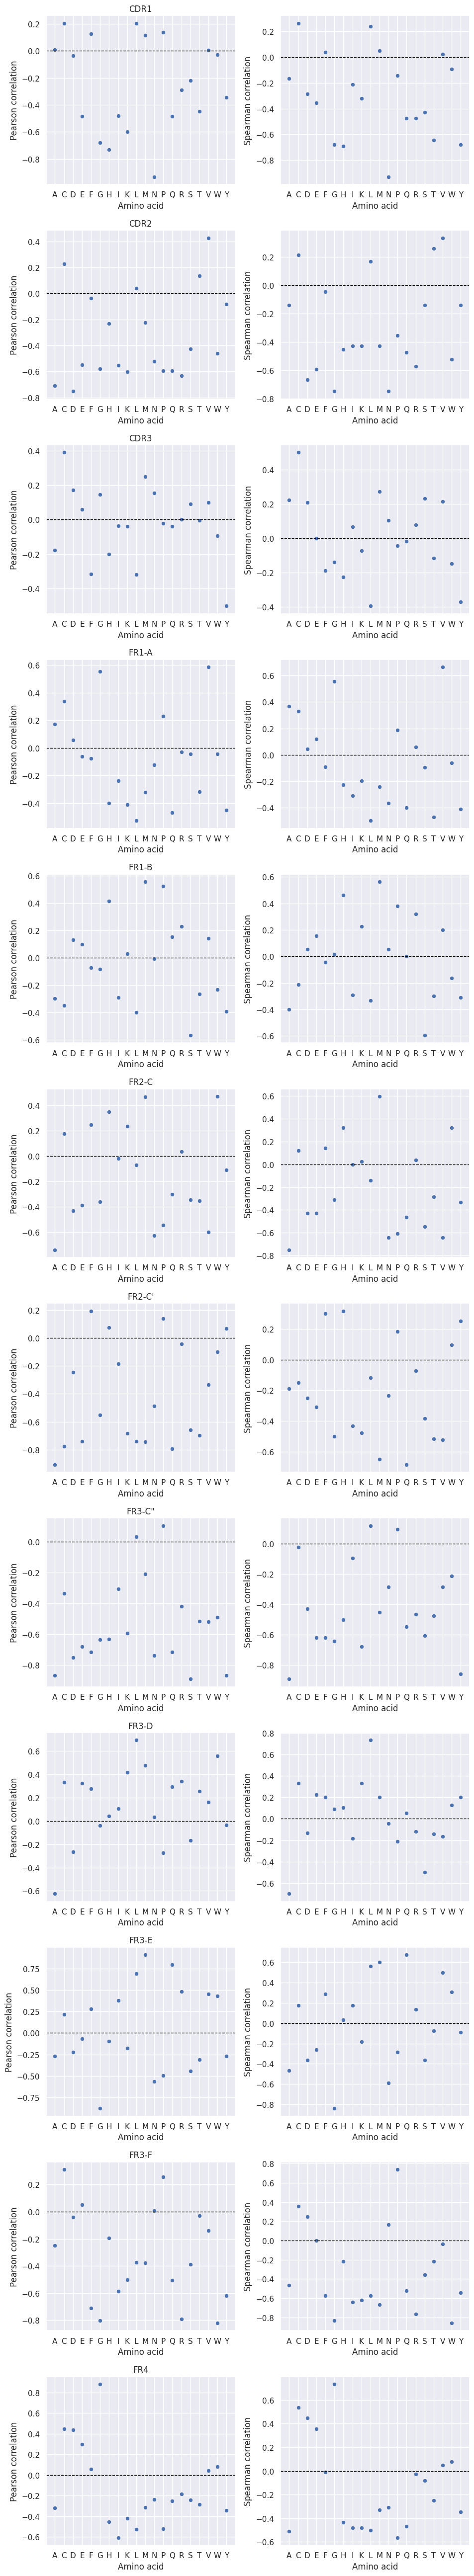

In [26]:
sns.set_theme()

regions = chain_H_region_MUT_AA_correlation_df["Region"].unique()
fig, axes = plt.subplots(len(regions), 2, figsize=(12, 13), sharex=False, sharey=False)
# plt.suptitle(f"Correlations between AntiBERTy and Rosetta scores\n" 
#              f"across the H-chain variable regions\n"
#              f"(Trastuzumab - PDB:7mn8)\n")

for i, region in enumerate(regions):
    region_data = chain_H_region_MUT_AA_correlation_df[chain_H_region_MUT_AA_correlation_df["Region"] == region]

    sns.scatterplot(data = region_data, x = "Amino acid", y = "Pearson correlation", ax=axes[i, 0])
    axes[i, 0].set_title(region)
    axes[i, 0].set_xlabel("Amino acid")
    axes[i, 0].set_ylabel("Pearson correlation")
    axes[i, 0].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
    # axes[i, 0].legend(loc = "right", bbox_to_anchor=(1.27, 0.5), title = "Region")

    sns.scatterplot(data = region_data, x = "Amino acid", y = "Spearman correlation", ax=axes[i, 1])
    axes[i, 0].set_title(region)
    axes[i, 1].set_xlabel("Amino acid")
    axes[i, 1].set_ylabel("Spearman correlation")
    axes[i, 1].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
    # axes[0, 1].legend(loc = "right", bbox_to_anchor=(1.27, 0.5), title = "Region")

plt.tight_layout(rect=[0, 0, 0.8, 4]) 
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files"
plt.savefig(f"{output_folder}/HV_MUT_AA_correlations_split_by_region")

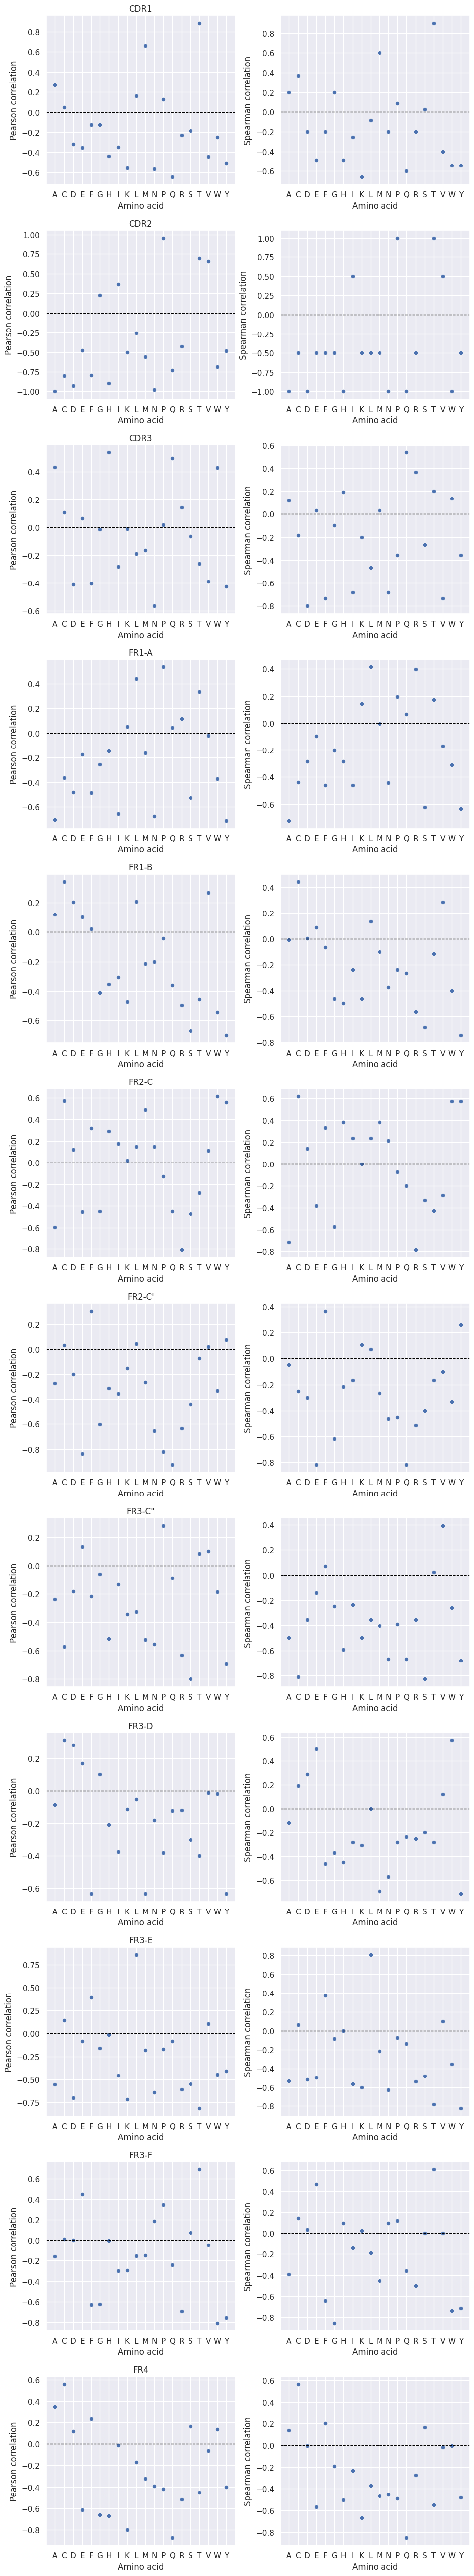

In [27]:
sns.set_theme()

regions = chain_L_region_MUT_AA_correlation_df["Region"].unique()
fig, axes = plt.subplots(len(regions), 2, figsize=(12, 13), sharex=False, sharey=False)
# plt.suptitle(f"Correlations between AntiBERTy and Rosetta scores\n" 
#              f"across the H-chain variable regions\n"
#              f"(Trastuzumab - PDB:7mn8)\n")

for i, region in enumerate(regions):
    region_data = chain_L_region_MUT_AA_correlation_df[chain_L_region_MUT_AA_correlation_df["Region"] == region]

    sns.scatterplot(data = region_data, x = "Amino acid", y = "Pearson correlation", ax=axes[i, 0])
    axes[i, 0].set_title(region)
    axes[i, 0].set_xlabel("Amino acid")
    axes[i, 0].set_ylabel("Pearson correlation")
    axes[i, 0].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
    # axes[i, 0].legend(loc = "right", bbox_to_anchor=(1.27, 0.5), title = "Region")

    sns.scatterplot(data = region_data, x = "Amino acid", y = "Spearman correlation", ax=axes[i, 1])
    axes[i, 0].set_title(region)
    axes[i, 1].set_xlabel("Amino acid")
    axes[i, 1].set_ylabel("Spearman correlation")
    axes[i, 1].axhline(y=0, color = "black", linestyle = "--", linewidth = 1)
    # axes[0, 1].legend(loc = "right", bbox_to_anchor=(1.27, 0.5), title = "Region")

plt.tight_layout(rect=[0, 0, 0.8, 4]) 
output_folder = "Final work/Validation against clinically approved drugs/7mn8/7mn8_pictures_and_pdb_files"
plt.savefig(f"{output_folder}/LV_MUT_AA_correlations_split_by_region")